# Лабораторная работа №5 “Метод опорных векторов”

## 1. Загрузите данные ex5data1.mat из файла.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

## 1. Загрузите данные ex5data1.mat из файла.

In [6]:
mat = loadmat("data/ex5data1.mat")
X = mat["X"]
y = mat["y"]
y = y.reshape(y.shape[0])

## 2. Постройте график для загруженного набора данных: по осям - переменные X1, X2, а точки, принадлежащие различным классам должны быть обозначены различными маркерами.


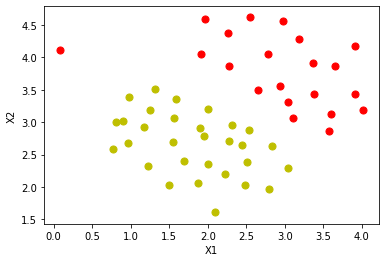

In [7]:
m,n = X.shape[0],X.shape[1]
pos, neg = (y==1).reshape(m, 1), (y==0).reshape(m, 1)

fig, ax = plt.subplots()
ax.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r", s=50)
ax.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y", s=50)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

## 3. Обучите классификатор с помощью библиотечной реализации SVM с линейным ядром на данном наборе.


In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear", C=1)
classifier.fit(X,np.ravel(y))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## 4. Постройте разделяющую прямую для классификаторов с различными параметрами C = 1, C = 100 (совместно с графиком из пункта 2). Объясните различия в полученных прямых?


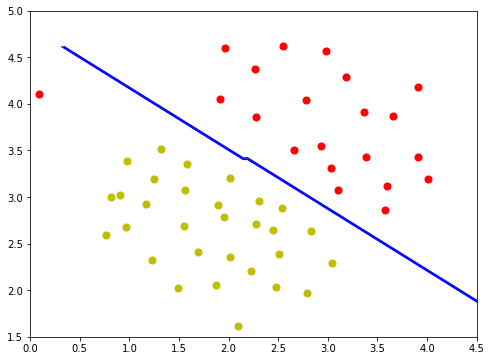

In [219]:
def plot_decision_line(classifier):
    plt.figure(figsize=(8,6))
    plt.scatter(X[pos[:,0],0], X[pos[:,0],1], c="r", s=50)
    plt.scatter(X[neg[:,0],0], X[neg[:,0],1], c="y", s=50)

    # plotting the decision boundary
    X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
    plt.contour(X_1,X_2, classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
    plt.xlim(0,4.5)
    plt.ylim(1.5,5)

plot_decision_line(classifier)

In [220]:
classifier = SVC(kernel="linear", C=100)
classifier.fit(X,np.ravel(y))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

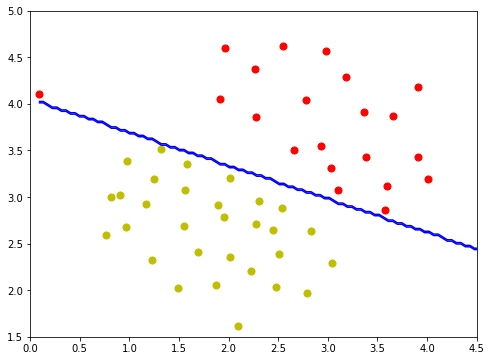

In [221]:
plot_decision_line(classifier)

При С = 100 мы видим, что модель реагирует на один пример, который отклонился от всех остальных.
Параметр С это штраф за ошибку и в sklearn значение по умолчанию для С равно 1. Таким образом, при С = 100 наша модель скорее всего переобучается.

## 5. Реализуйте функцию вычисления Гауссового ядра для алгоритма SVM.

In [222]:
def gaussian(x, l, sigma):
    degree = ((x - l)**2).sum(axis=1)
    return np.e ** (-degree) / (2 * sigma**2)

## 6. Загрузите данные ex5data2.mat из файла.


In [239]:
mat2 = loadmat("data/ex5data2.mat")
X = mat2["X"]
y = mat2["y"]
y = y.reshape(y.shape[0])

## 7. Обработайте данные с помощью функции Гауссового ядра.

In [240]:
X_gaussian = np.array([gaussian(X, l, 1) for l in X])

## 8. Обучите классификатор SVM.


In [241]:
clf_gaussian = SVC(kernel='rbf', C=1, gamma=30)
clf_gaussian.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 9. Визуализируйте данные вместе с разделяющей кривой (аналогично пункту 4).

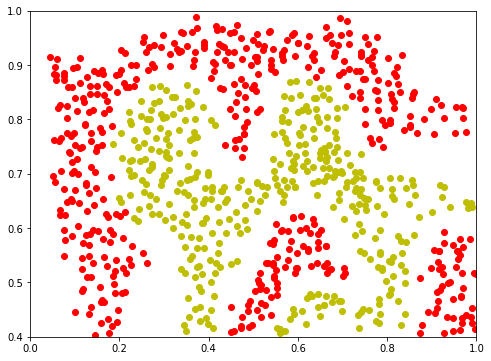

In [242]:
m, n = X.shape[0], X.shape[1]
pos, neg = (y==1).reshape(m,1), (y==0).reshape(m,1)
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0], X[pos[:,0],1], c="r")
plt.scatter(X[neg[:,0],0], X[neg[:,0],1], c="y")
plt.xlim(0,1)
plt.ylim(0.4,1)
plt.show()

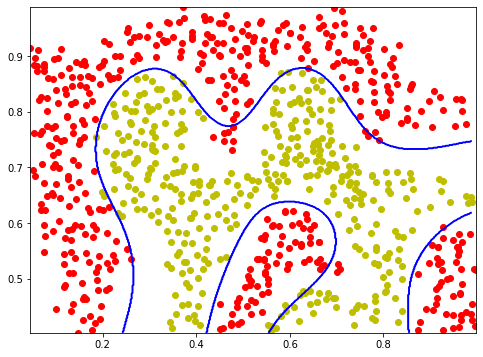

In [243]:
def plot_decision_line(classifier, X, y):
    m, n = X.shape[0], X.shape[1]
    pos, neg = (y==1).reshape(m, 1), (y==0).reshape(m, 1)

    plt.figure(figsize=(8,6))
    plt.scatter(X[pos[:,0],0], X[pos[:,0],1], c="r")
    plt.scatter(X[neg[:,0],0], X[neg[:,0],1], c="y")


    # plotting the decision boundary
    X_5, X_6 = np.meshgrid(np.linspace(X[:,0].min(), X[:,1].max(), num=500), 
                           np.linspace(X[:,1].min(), X[:,1].max(), num=500))
    plt.contour(X_5, X_6, classifier.predict(np.array([X_5.ravel(), X_6.ravel()]).T).reshape(X_5.shape), 1, colors="b")
    plt.xlim(X[:, 0].min(), X[:, 0].max())
    plt.ylim(X[:, 1].min(), X[:, 1].max())

plot_decision_line(clf_gaussian, X, y)

## 10. Загрузите данные ex5data3.mat из файла.


In [5]:
mat3 = loadmat("data/ex5data3.mat")
X = mat3["X"]
y = mat3["y"]
y = y.reshape(y.shape[0])

Xval = mat3["Xval"]
yval = mat3["yval"]
yval = yval.reshape(yval.shape[0])

## 11. Вычислите параметры классификатора SVM на обучающей выборке, а также подберите параметры C и σ2 на валидационной выборке.

In [79]:
def calculate_best_params(X, y, Xval, yval, C_list, gamma_list):
    best_score = -np.inf
    best_params = None
    for C in C_list:
        for gamma in gamma_list:
            s = SVC(kernel='rbf', C=C, gamma=gamma)
            s.fit(X, y)
            score = s.score(Xval, yval)
            if score > best_score:
                best_score = score
                best_params = (C, gamma)
    return best_params

In [7]:
C, gamma = calculate_best_params(X, y, Xval, yval,
                                 C_list=np.logspace(-1, 3, 100), gamma_list=np.linspace(0.0001, 10, 100))

In [ ]:
classifier = SVC(C = C, gamma = gamma)
classifier.fit(X, y.ravel())

## 12. Визуализируйте данные вместе с разделяющей кривой (аналогично пункту 4).

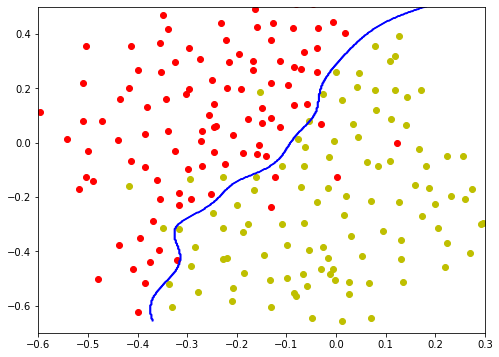

In [234]:
plot_decision_line(classifier, X, y)

## 13. Загрузите данные spamTrain.mat из файла.

In [24]:
spam_mat = loadmat("data/spamTrain.mat")
X_train =spam_mat["X"]
y_train = spam_mat["y"]
y_train = y_train.reshape(y_train.shape[0])

## 14. Обучите классификатор SVM.

In [25]:
svm_spam_train = SVC(kernel='rbf')
svm_spam_train.fit(X_train, y_train)

/Users/anton/Documents/Maga/ml_venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## 15. Загрузите данные spamTest.mat из файла.

In [80]:
spam_mat = loadmat("data/spamTest.mat")
X_test =spam_mat["Xtest"]
y_test = spam_mat["ytest"]
y_test = y_test.reshape(y_test.shape[0])

## 16. Подберите параметры C и σ2.

In [81]:
vals = [150, 200, 300]
C, gamma = calculate_best_params(
    X_train, y_train, X_test, y_test,
    C_list=np.logspace(2, 3, 10), gamma_list=np.linspace(0.0001, 0.0003, 10)
)

In [82]:
C, gamma

(100.0, 0.0002111111111111111)

## 17. Реализуйте функцию предобработки текста письма.


In [83]:
import html
import re
import nltk
from nltk.stem.snowball import SnowballStemmer

from nltk.corpus import stopwords
nltk.download("stopwords")

def preprocess(body):      
    body = body.lower()

    text = html.unescape(body)
    body = re.sub(r'<[^>]+?>', '', text)

    regx = re.compile(r"(http|https)://[^\s]*")
    body = regx.sub(repl=" httpaddr ", string=body)

    regx = re.compile(r"\b[^\s]+@[^\s]+[.][^\s]+\b")
    body = regx.sub(repl=" emailaddr ", string=body)
    
    regx = re.compile(r"\b[\d.]+\b")
    body = regx.sub(repl=" number ", string=body)

    regx = re.compile(r"[$]")
    body = regx.sub(repl=" dollar ", string=body)

    regx = re.compile(r"([^\w\s]+)|([_-]+)")  
    body = regx.sub(repl=" ", string=body)
    regx = re.compile(r"\s+")
    body = regx.sub(repl=" ", string=body)

    body = body.strip(" ")
    bodywords = body.split(" ")
    keepwords = [word for word in bodywords if word not in stopwords.words('english')]
    stemmer = SnowballStemmer("english")
    stemwords = [stemmer.stem(wd) for wd in keepwords]
    body = " ".join(stemwords)

    return body

[nltk_data] Downloading package stopwords to /Users/anton/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 18. Загрузите коды слов из словаря vocab.txt.


In [84]:
def load_vocabulary(filename):
    vocab = {}

    with open(filename, 'r') as f:
        for line in f.readlines():
            l = line.replace('\n', '').split('\t')
            vocab[l[1]] = int(l[0])

    return vocab

In [85]:
vocab = load_vocabulary('data/vocab.txt')

In [94]:
vocab

{'aa': 1,
 'ab': 2,
 'abil': 3,
 'abl': 4,
 'about': 5,
 'abov': 6,
 'absolut': 7,
 'abus': 8,
 'ac': 9,
 'accept': 10,
 'access': 11,
 'accord': 12,
 'account': 13,
 'achiev': 14,
 'acquir': 15,
 'across': 16,
 'act': 17,
 'action': 18,
 'activ': 19,
 'actual': 20,
 'ad': 21,
 'adam': 22,
 'add': 23,
 'addit': 24,
 'address': 25,
 'administr': 26,
 'adult': 27,
 'advanc': 28,
 'advantag': 29,
 'advertis': 30,
 'advic': 31,
 'advis': 32,
 'ae': 33,
 'af': 34,
 'affect': 35,
 'affili': 36,
 'afford': 37,
 'africa': 38,
 'after': 39,
 'ag': 40,
 'again': 41,
 'against': 42,
 'agenc': 43,
 'agent': 44,
 'ago': 45,
 'agre': 46,
 'agreement': 47,
 'aid': 48,
 'air': 49,
 'al': 50,
 'alb': 51,
 'align': 52,
 'all': 53,
 'allow': 54,
 'almost': 55,
 'alon': 56,
 'along': 57,
 'alreadi': 58,
 'alsa': 59,
 'also': 60,
 'altern': 61,
 'although': 62,
 'alwai': 63,
 'am': 64,
 'amaz': 65,
 'america': 66,
 'american': 67,
 'among': 68,
 'amount': 69,
 'amp': 70,
 'an': 71,
 'analysi': 72,
 'analys

## 19. Реализуйте функцию замены слов в тексте письма после предобработки на их соответствующие коды.


In [131]:
def get_codes_vector(body, vocab):
    vector = []
    for word in body.split(' '):
        code = vocab.get(word, None)
        if code:
            vector.append(code)

    return vector

## 20. Реализуйте функцию преобразования текста письма в вектор признаков (в таком же формате как в файлах spamTrain.mat и spamTest.mat).

In [135]:
def get_features_vector(codes_vector, vocab):
    codes = set(codes_vector)
    vec = np.zeros(len(vocab), dtype=int)

    for word_code in vocab.values():
        vec[word_code - 1] = int(word_code in codes)

    return vec

## 21. Проверьте работу классификатора на письмах из файлов emailSample1.txt, emailSample2.txt, spamSample1.txt и spamSample2.txt.


In [167]:
import os

def make_set_texts(texts, vocab):
    texts_features_set = []
    for email in texts:
        clean_text = preprocess(email)
        codes_vector = get_codes_vector(clean_text, vocab)
        features_vector = get_features_vector(codes_vector, vocab)
        texts_features_set.append(features_vector)

    return texts_features_set

def make_set(files, vocab):
    test_emails = []
    for file in files:
        with open(os.path.join('data', file), 'r') as f:
            test_emails.append(f.read())
    
    text_set = make_set_texts(test_emails, vocab)

    return np.array(text_set)

In [168]:
test_files = ['emailSample1.txt', 'spamSample1.txt', 'emailSample2.txt', 'spamSample2.txt']

test_set = make_set(test_files, vocab)

In [169]:
svm_spam = SVC(kernel='rbf', C=C, gamma=gamma)
svm_spam.fit(X_train, y_train)
svm_spam.predict(test_set)

array([0, 1, 0, 1], dtype=uint8)

Как видим, наш классификатор работает корректно на данных примерах.

## 22. Также можете проверить его работу на собственных примерах.


In [170]:
test_spam_email = """
    You are not authorized to view this page.
    Please contact us at 717-291-4689 if you feel you are receiving this message in error
"""

test_not_spam = """
Hi, my development site is running on IIS with SMTP server.
Mail is working fine when creating new users or getting a password reset.
I have built a webform and upon submitting I'll get this error.
"""

def predict(text):
    clean_text = preprocess(text)
    codes_vector = get_codes_vector(clean_text, vocab)
    features_vector = get_features_vector(codes_vector, vocab)
    features_vector = np.array([features_vector])

    return svm_spam.predict(features_vector)

print(predict(test_spam_email))
print(predict(test_not_spam))

[1]
[0]


На наших примерах мы также получаем корректный результат.

## 23. Создайте свой набор данных из оригинального корпуса текстов - http://spamassassin.apache.org/old/publiccorpus/.

In [171]:
spam_emails_path = os.path.join('data', 'spam')
ham_emails_path = os.path.join('data', 'easy_ham')

spam_files = [os.path.join(spam_emails_path, fname) for fname in os.listdir(spam_emails_path)]
ham_files = [os.path.join(ham_emails_path, fname) for fname in os.listdir(ham_emails_path)]

def read_files_texts(files):
    texts_corpus = []
    for filename in files:
        with open(filename, "r") as f:
            try: 
                lines = f.readlines()
                idx = lines.index("\n")
                texts_corpus.append(preprocess(''.join(lines[idx:])))
            except:
                pass
    
    return texts_corpus

spam_files_texts = read_files_texts(spam_files)
ham_files_texts = read_files_texts(ham_files)

## 24. Постройте собственный словарь.

In [172]:
def make_vocab(texts_corpus):
    import collections

    all_words = [word for text in texts_corpus for word in text.split(" ")]
    words_counter = collections.Counter(all_words)
    vocab_list = [key for key in words_counter if words_counter[key] > 100 and len(key) > 1]
    return {word: i for i, word in enumerate(vocab_list)}

vocab_v2 = make_vocab(spam_files_texts + ham_files_texts)
vocab_v2

{'interest': 0,
 'rate': 1,
 'point': 2,
 'number': 3,
 'year': 4,
 'help': 5,
 'find': 6,
 'best': 7,
 'need': 8,
 'hundr': 9,
 'home': 10,
 'improv': 11,
 'second': 12,
 'even': 13,
 'less': 14,
 'servic': 15,
 'free': 16,
 'new': 17,
 'without': 18,
 'fill': 19,
 'quick': 20,
 'simpl': 21,
 'form': 22,
 'start': 23,
 'futur': 24,
 'plan': 25,
 'today': 26,
 'visit': 27,
 'httpaddr': 28,
 'unsubscrib': 29,
 'pleas': 30,
 'must': 31,
 'comput': 32,
 'user': 33,
 'special': 34,
 'packag': 35,
 'deal': 36,
 'softwar': 37,
 'profession': 38,
 'includ': 39,
 'yes': 40,
 'featur': 41,
 'low': 42,
 'price': 43,
 'protect': 44,
 'secur': 45,
 'privat': 46,
 'inform': 47,
 'allow': 48,
 'transfer': 49,
 'file': 50,
 'send': 51,
 'mail': 52,
 'data': 53,
 'easili': 54,
 'perform': 55,
 'great': 56,
 'dollar': 57,
 'valu': 58,
 'get': 59,
 'copi': 60,
 'email': 61,
 'filter': 62,
 'opt': 63,
 'system': 64,
 'state': 65,
 'law': 66,
 'wish': 67,
 'well': 68,
 'list': 69,
 'thousand': 70,
 'provi

## 25. Как изменилось качество классификации? Почему?

In [177]:
y_test_v2 = [0] * len(ham_files_texts) + [1] * len(spam_files_texts)

x_vocab2 = make_set_texts(spam_files_texts + ham_files_texts, vocab_v2)
svm_spam_vocab_2 = SVC(kernel='rbf', C=C, gamma=gamma)
svm_spam_vocab_2.fit(x_vocab2, y_test_v2)

svm_spam_vocab_1 = SVC(kernel='rbf', C=C, gamma=gamma)
x_vocab1 = make_set_texts(spam_files_texts + ham_files_texts, vocab)
svm_spam_vocab_1.fit(x_vocab1, y_test_v2)

print(f'Score of classicator v2: {svm_spam_vocab_2.score(x_vocab2, y_test_v2)}')
print(f'Score of classicator v1: {svm_spam_vocab_1.score(x_vocab1, y_test_v2)}')

Score of classicator v2: 0.8525594808940159
Score of classicator v1: 0.8713049747656814


Как видим, на двух идентичных сетах данных мы получаем выше точность, когда строим тренировочный сет с помощью первого словаря данных. Это достаточно логично, так как первый словарь содержит больше слов => мы можем выделить больше признаков.